# Doctor's Consultation Fees Prediction

Problem Statement: Predict A Doctor's Consultation Fee

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that.

Size of training set: 5961 records

Size of test set: 1987 records

FEATURES_:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Place: Area and the city where the doctor is located.

Fees: Fees charged by the doctor (Target Variable)

# Fees: Fees charged by the doctor (Target Variable)

Since  fees is a continous data. we will be using regression models here. Let us import the necessary libraries for that

# Import Libraries

In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [192]:
#Loading the data for model building

data=pd.read_excel("Final_Train.xlsx")

In [193]:
#Loading the data for prediction

df=pd.read_excel("Final_Test.xlsx")

In [194]:
data.head()  #train data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [195]:
df.head() #predicting data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


The output of this dataset needs to be predicted after building the model

In [196]:
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [197]:
data.shape

(5961, 7)

There are 5961 rows and 7 columns including target variable

In [198]:
df.shape

(1987, 6)

There are 1987 rows and 6 columns . we have to find target variable through the model

In [199]:
data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

All the data types are of categorical. Only target column is numeric. All categorical data need to be encoded

In [200]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

All the fields are of object type (categorical) in test dataset

The data seems to be very messed. A deep data cleaning is required



In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


There are many null values also seen

# Exploratory Data Analysis

# Missing Values

In [203]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

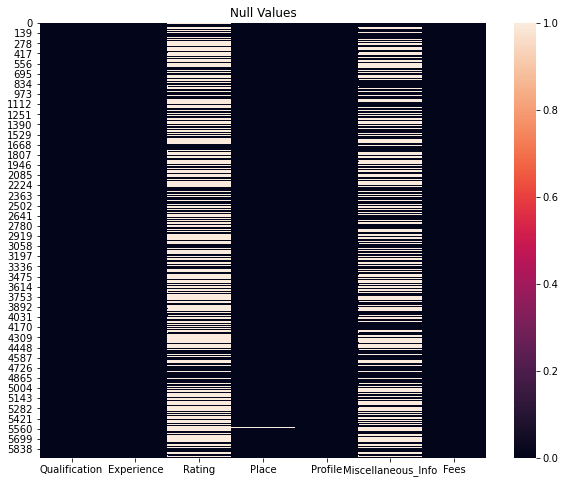

In [204]:
# heatmap on null values   train data
plt.figure(figsize=[10,8])
sns.heatmap(data.isnull())
plt.title("Null Values")
plt.show()

In [205]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

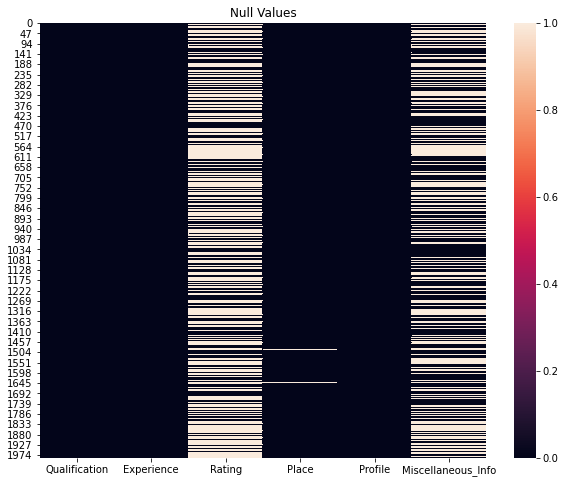

In [206]:
# heatmap on null values
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

There are huge number of missing values in Rating and Miscellaneous info

A small amount of missing values is also present in Place Column

Let us deal with all the columns individually

Experience Column : we can extract the numeric experience from the column

In [207]:
#traindata

data['Experience']=data['Experience'].str.split().str[0]
data['Experience']=data['Experience'].astype(int)

In [208]:
df['Experience']=df['Experience'].str.split().str[0]
df['Experience']=df['Experience'].astype(int)

In [209]:
data.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350


Experience is succesfully converted to numeric

Now we can deal with Place column, Let us replace the small number of missing values as "Unknown"  and extract City and Locality separetely

In [210]:
#traindata

data['Place'].fillna("Unknown,Unknown",inplace=True)
data["local"]=data["Place"].str.split(",").str[0]
data["City"]=data["Place"].str.split(",").str[1]

In [211]:
data.head(3)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,local,City
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore


In [212]:
#now we can drop the Place column
data.drop("Place",axis=1,inplace=True)

In [213]:
#Test data
df['Place'].fillna("Unknown,Unknown",inplace=True)
df["local"]=df["Place"].str.split(",").str[0]
df["City"]=df["Place"].str.split(",").str[1]
df.drop("Place",axis=1,inplace=True)

Now Rating column. we can change it from percentage to numeric and will split into bins for easy visulaization after filling null values

In [214]:
#train data. we are giving -1% to missing values to give it some importance
data['Rating'].fillna('-1%',inplace=True)

In [215]:
data['Rating'].isnull().sum()  # null values removed

0

In [216]:
# extract the actual value of data removing % sign
data["Rating"]=data["Rating"].apply(lambda x:str(x).replace("%",'')).astype(int)

In [217]:
data.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,local,City
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,-1,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,-1,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


Rating column is changed to numeric. similarily we can do with test data

In [218]:
#Repeating the same step with Test data
df['Rating'].fillna('-1%',inplace=True)
df["Rating"]=df["Rating"].apply(lambda x:str(x).replace("%",'')).astype(int)

Lets us conver rating columns data into groups such that it will be easy to visualize. Here less than 0 belongs to 0 group. while 0-9 belongs to 1 group , 10-19 belongs to 2 group and so on

In [219]:
#train data
bins=[-1,0,10,20,30,40,50,60,70,80,90,100]   
labels=[i for i in range(11)]
data["Rating"]=pd.cut(data["Rating"],bins=bins,labels=labels,include_lowest=True)

#test data
bins=[-1,0,10,20,30,40,50,60,70,80,90,100]   
labels=[i for i in range(11)]
df["Rating"]=pd.cut(data["Rating"],bins=bins,labels=labels,include_lowest=True)

In [220]:
data.head(2)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,local,City
0,"BHMS, MD - Homeopathy",24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore


Now rating is encoded in as neat data

In [221]:
data['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

Qualification column

In [222]:
# number of qualification done by one doctor
data['Qualification_count'] = data['Qualification'].apply(lambda x: len(x.split(",")))
data['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [223]:
# max 10 qual is done by 1 doctor, let's have a look 
data[data['Qualification_count'] == 10]

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,local,City,Qualification_count
2035,"Fellowship in Oral implantlogy, Certified Adva...",22,10,Dentist,RCT - Root Canal Treatment Cosmetic/ Aesthetic...,300,Ashok Nagar,Chennai,10


In [224]:
data['Qualification'].nunique()

1420

There are lots of Qualifications seen and doctor has done more than 1 qualification but most doctors has done 1 or 2 qualification only.
 
 
And the data is to much messy like, 'MBA -Healthcare' and ‘MBA’ which referred to same category so here we will take the top 10 Qualification that occurs the most.

In [225]:
#train data
# Dict of each Qualification with their counts
data['Qualification'] = data['Qualification'].str.split(",")
Qualification = {}

for x in data['Qualification'].values:
    for qual in x:
        qual = qual.strip()
        if qual in Qualification:        #checks if value is already there
            Qualification[qual] += 1     #increases its count by one
        else:
            Qualification[qual] = 1      #else includes it


In [226]:
#print(Qualification)

In [227]:
# Now, Extract Top 10 Qual from Qualification
most_qual = sorted(Qualification.items(), key=lambda x: x[1], reverse=True)[:10]
final_qual = []

for qual in most_qual:
    final_qual.append(qual[0])

print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [228]:
# Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    data[qual] = 0
    
for x,y in zip(data['Qualification'].values, np.array([i for i in range(len(data))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            data[c][y] = 1

In [229]:
# drop the column which are not required now,
data.drop(['Qualification','Qualification_count'],axis=1, inplace=True)

In [230]:
data.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,local,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


Let us do the same thing for Test data

In [231]:
#test data
# Dict of each Qualification with their counts
df['Qualification'] = df['Qualification'].str.split(",")
Qualification = {}

for x in df['Qualification'].values:
    for qual in x:
        qual = qual.strip()
        if qual in Qualification:        #checks if value is already there
            Qualification[qual] += 1     #increases its count by one
        else:
            Qualification[qual] = 1      #else includes it


In [232]:
# Now, Extract Top 10 Qual from Qualification
most_qual = sorted(Qualification.items(), key=lambda x: x[1], reverse=True)[:10]
final_qual = []

for qual in most_qual:
    final_qual.append(qual[0])

print(final_qual)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [233]:
# Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    df[qual] = 0
    
for x,y in zip(df['Qualification'].values, np.array([i for i in range(len(df))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df[c][y] = 1

In [234]:
df.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,local,City,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,[MBBS],35,1,General Medicine,NaN,Ghatkopar East,Mumbai,1,0,0,0,0,0,0,0,0,0
1,"[MBBS, Diploma in Otorhinolaryngology (DLO)]",31,1,ENT Specialist,NaN,West Marredpally,Hyderabad,1,0,0,0,0,0,0,0,1,0
2,"[MBBS, DDVL]",40,0,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai,1,0,0,0,0,0,0,0,0,1
3,[BAMS],0,0,Ayurveda,NaN,New Ashok Nagar,Delhi,0,0,0,1,0,0,0,0,0,0
4,"[BDS, MDS - Conservative Dentistry & Endodont...",16,1,Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore,0,1,0,0,0,0,0,0,0,0


In [235]:
# drop the column which are not required now,
df.drop(['Qualification'],axis=1, inplace=True)

Now, we can see that we are having top 10 Qual columns in our training set which are perfectly one-hot encoded. where there is 2 Qual from top 10 in that row two 1 are there, and it's correct.

Profile column is fine

we can check the city and local columns for any unusual change in data like spaces and others

In [237]:
data['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Unknown',
       ' Sector 5', nan], dtype=object)

we can see spaces in each cities and a unrecognizing value as Sector 5. we should change that

In [239]:
#removing extaspaces
data['City'] = data['City'].apply(lambda x: re.sub(' +','',str(x)))

In [240]:
data['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 25
Sector5                  1
nan                      1
Name: City, dtype: int64

In [241]:
# there are some mis-entry in city column, let's find it out
data[(data['City'] == 'Sector5') | (data['City'] == 'nan')]

,Experience,Rating,Profile,Miscellaneous_Info,Fees,local,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
2169,11,0,Dentist,NaN,250,Dwarka,Sector5,0,1,0,0,0,0,0,0,0,0
3980,23,0,Dentist,NaN,250,e,nan,0,1,0,0,0,0,0,0,0,0


whereever the locality is Dwarka the city is Delhi, and this Sector5 is area of that so it's misclassified here. which we have to correct.
And where city is nan there we have to impute this to unknown in locality and city both.

In [243]:
data['City'] = np.where(data['City'] == "Sector5", "Delhi", data['City'])
data['local'][3980] = "Unknown"
data['City'][3980] = "Unknown"

In [244]:
data['City'].isnull().sum()

0

In [245]:
data['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 26
Name: City, dtype: int64

The City data is pretty good to move for model feeding

In [246]:
#local
data['local'].value_counts()

HSR Layout          75
Andheri West        70
Dwarka              68
Banjara Hills       64
Mulund West         54
                    ..
Rana Pratap Bagh     1
Athani               1
Baghlingampally      1
Gulmohar Park        1
Rohini Sector 11     1
Name: local, Length: 866, dtype: int64

we can repeat it for the test data also

In [252]:
df['City'].unique()

array([' Mumbai', ' Hyderabad', ' Chennai', ' Delhi', ' Bangalore',
       ' Coimbatore', ' Thiruvananthapuram', ' Ernakulam', 'Unknown'],
      dtype=object)

In [253]:
#removing extaspaces
df['City'] = df['City'].apply(lambda x: re.sub(' +','',str(x)))

In [254]:
df['City'].value_counts()

Bangalore             420
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Unknown                 6
Name: City, dtype: int64

spaces are removed from test data also

In [249]:
# let us see for each city how many locality are there
data.groupby('City')['local'].nunique().reset_index()

,City,local
0,Bangalore,153
1,Chennai,124
2,Coimbatore,48
3,Delhi,200
4,Ernakulam,52
5,Hyderabad,135
6,Mumbai,115
7,Thiruvananthapuram,48
8,Unknown,1


we have data of atleast each locality of that particular city we have. So  we have the data of atleast each local of that particular city, So by seeing the relations of localilty avriable with target variable it is found be not so relevant. So we will not us local columns in our model as it may rise complexes. we have to drop it 

   # Data Visulaization and Encoding

Before encoding a categorical variable, look at relationship of data with respect to target column To have better understand the data

Profile with respect to Consultation fees

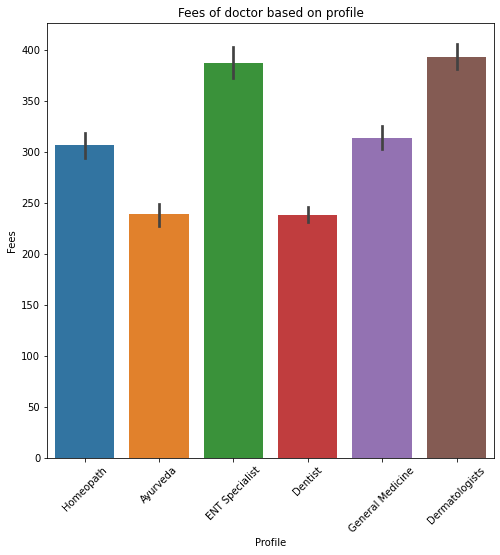

In [251]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=data)
plt.title("Fees of doctor based on profile")
plt.xticks(rotation=45)
plt.show()

observation : Doctor Fees with having profile as ENT Specialist and Dermatologist is very high then Homeopath and General medicine.Dentist is the lowest of all

Doctor fees in different city

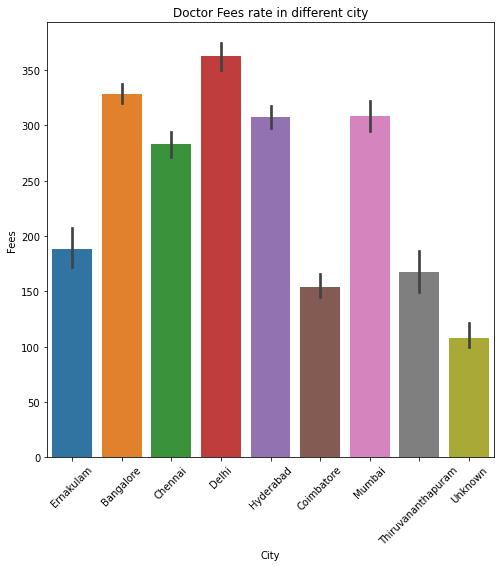

In [256]:
plt.figure(figsize=(8,8))
sns.barplot(x='City',y='Fees',data=data)
plt.title("Doctor Fees rate in different city")
plt.xticks(rotation=45)
plt.show()

observation:As Delhi, Banglore, Hyderabad, Mumbai and Chennai are in list of Tier 1 city so, as usual the doctor consultation fees in these metripolean cities are very high as compared to Tier 2 and Tier 3 city.

In [257]:
#traindata
# encoding Profile and city
data = pd.get_dummies(data, columns=['City','Profile'], prefix=['City','Profile'])

In [258]:
data.head()

,Experience,Rating,Miscellaneous_Info,Fees,local,MBBS,BDS,BAMS,BHMS,MD - Dermatology,...,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,NaN,300,Mathikere - BEL,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [260]:
data.columns

Index(['Experience', 'Rating', 'Miscellaneous_Info', 'Fees', 'local', 'MBBS',
       'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT',
       'Venereology & Leprosy', 'MD - General Medicine',
       'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy',
       'City_Bangalore', 'City_Chennai', 'City_Coimbatore', 'City_Delhi',
       'City_Ernakulam', 'City_Hyderabad', 'City_Mumbai',
       'City_Thiruvananthapuram', 'City_Unknown', 'Profile_Ayurveda',
       'Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath'],
      dtype='object')

In [261]:
#change the name of some columns to use it in correct way.
data.rename(columns={'MD - Dermatology':'MD_Dermatology','MS - ENT':'MS_ENT','Venereology & Leprosy':'Venereology_Leprosy',
                      'MD - General Medicine':'MD_General_Medicine','Diploma in Otorhinolaryngology (DLO)':'Diploma_in_Otorhinolaryngology',
                      'MD - Homeopathy':'MD_Homeopathy','Profile_ENT Specialist':'Profile_ENT_Specialist',
                      'Profile_General Medicine':'Profile_General_Medicine'}, inplace=True)

In [262]:
#traindata
# encoding Profile and city
df = pd.get_dummies(df, columns=['City','Profile'], prefix=['City','Profile'])
#change the name of some columns to use it in correct way.
df.rename(columns={'MD - Dermatology':'MD_Dermatology','MS - ENT':'MS_ENT','Venereology & Leprosy':'Venereology_Leprosy',
                      'MD - General Medicine':'MD_General_Medicine','Diploma in Otorhinolaryngology (DLO)':'Diploma_in_Otorhinolaryngology',
                      'MD - Homeopathy':'MD_Homeopathy','Profile_ENT Specialist':'Profile_ENT_Specialist',
                      'Profile_General Medicine':'Profile_General_Medicine'}, inplace=True)

#dropping the unnecessary columns
Miscellaneous_Info & locality:
    
Miscellaneous_Info is to much messy column and it consist the data which we already have like doctor address(city & locality) and Rating
local and city are approximate have same relationship so better to move with only city

so drop the Miscellaneous_Info and local column

In [264]:
data.drop(['Miscellaneous_Info','local'], axis=1, inplace=True)  #train

In [265]:
df.drop(['Miscellaneous_Info','local'], axis=1, inplace=True)    #test

In [266]:
data.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD_Dermatology,MS_ENT,Venereology_Leprosy,...,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
0,24,10,100,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,350,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [270]:
data.isnull().sum()

Experience                        0
Rating                            0
Fees                              0
MBBS                              0
BDS                               0
BAMS                              0
BHMS                              0
MD_Dermatology                    0
MS_ENT                            0
Venereology_Leprosy               0
MD_General_Medicine               0
Diploma_in_Otorhinolaryngology    0
MD_Homeopathy                     0
City_Bangalore                    0
City_Chennai                      0
City_Coimbatore                   0
City_Delhi                        0
City_Ernakulam                    0
City_Hyderabad                    0
City_Mumbai                       0
City_Thiruvananthapuram           0
City_Unknown                      0
Profile_Ayurveda                  0
Profile_Dentist                   0
Profile_Dermatologists            0
Profile_ENT_Specialist            0
Profile_General_Medicine          0
Profile_Homeopath           

In [271]:
df.isnull().sum()

Experience                        0
Rating                            0
MBBS                              0
BDS                               0
BHMS                              0
BAMS                              0
MD_Dermatology                    0
MS_ENT                            0
MD_General_Medicine               0
Venereology_Leprosy               0
Diploma_in_Otorhinolaryngology    0
DDVL                              0
City_Bangalore                    0
City_Chennai                      0
City_Coimbatore                   0
City_Delhi                        0
City_Ernakulam                    0
City_Hyderabad                    0
City_Mumbai                       0
City_Thiruvananthapuram           0
City_Unknown                      0
Profile_Ayurveda                  0
Profile_Dentist                   0
Profile_Dermatologists            0
Profile_ENT_Specialist            0
Profile_General_Medicine          0
Profile_Homeopath                 0
dtype: int64

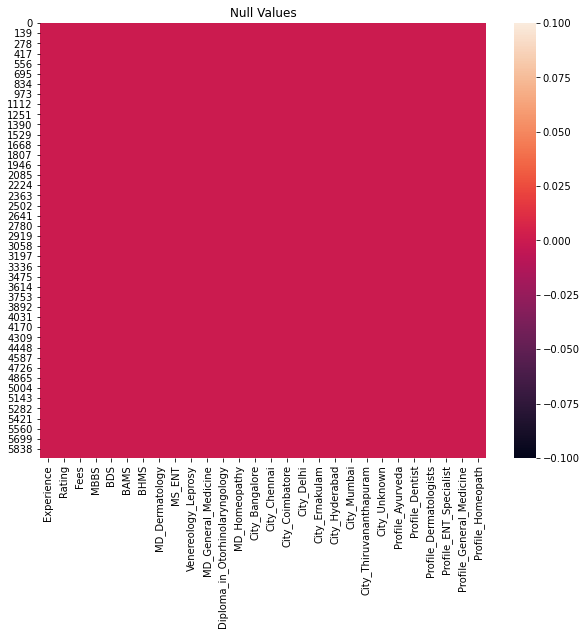

In [272]:
# heatmap on null values
plt.figure(figsize=[10,8])
sns.heatmap(data.isnull())
plt.title("Null Values")
plt.show()

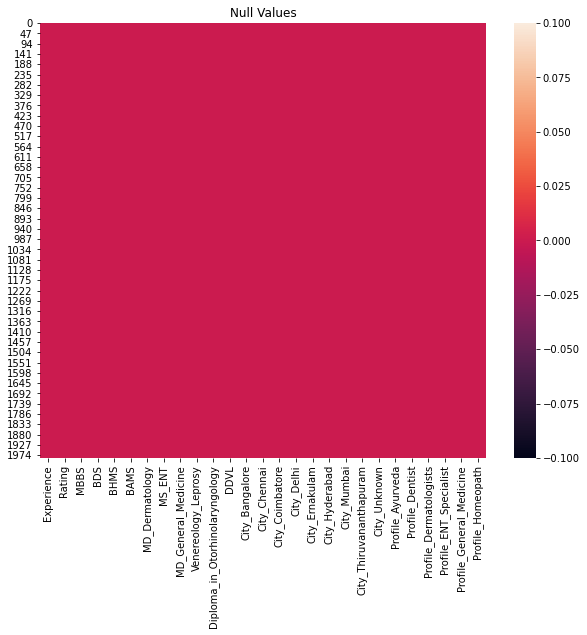

In [273]:
# heatmap on null values
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Now there are no null values in both dataset

The data is cleaned well such that we can feed the model. Before doing let us visualize the Experience and rating with respect to the fees

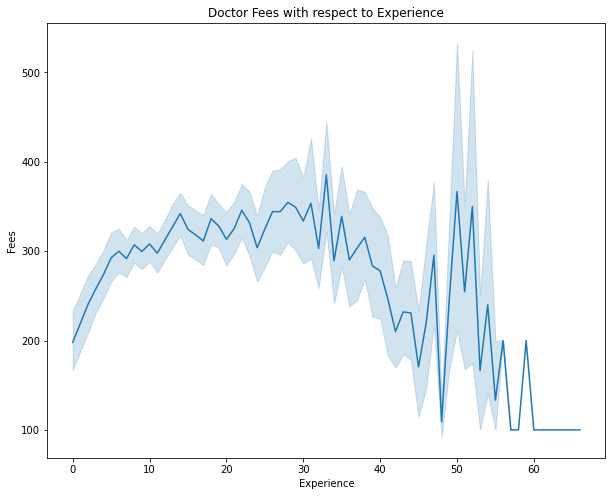

In [267]:
# Doctor Fees wrt to Experience
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=data)
ax.set_title("Doctor Fees with respect to Experience")
plt.show()

most of us assumed that there is some association between the experience of the doctor and the fees they charged. Indeed there is, but it might not what we expect it to be. The average Fees increases from 25 years and is at peak near about 30 to 35. And Average Fees Decreases as there in further increase in Experience.

Ratings on fees and experience

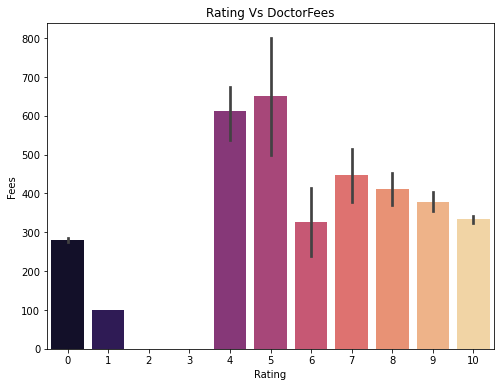

In [268]:
plt.figure(figsize=(8,6))
sns.barplot(x='Rating',y='Fees',data=data,palette='magma')
plt.title("Rating Vs DoctorFees")
plt.show()

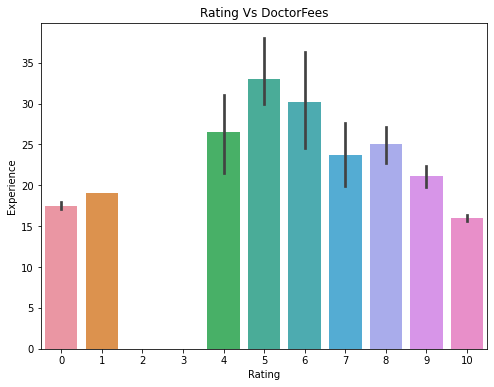

In [269]:
plt.figure(figsize=(8,6))
sns.barplot(x='Rating',y='Experience',data=data)
plt.title("Rating Vs DoctorFees")
plt.show()

Observation :
    
we have grouped the rating in 10 bins, eg: bin5 will be rating of 40-49%.

As, we can see that High rating does not relate to high fees charged(infact low fees can be reason of high rating) and where fees are charged so high, there rating is between 30-60%.

The median of experience in bin 4 & 5 is 27 and 31 years respectively. whereas in highest rating of 10th bin the median experience is 14 years.

Since it is of categorical type. we neednot check for skewness and outliers. Even then let's have some insight on statistical and correlation

# Statistical data

In [275]:
data.dtypes

Experience                           int32
Rating                            category
Fees                                 int64
MBBS                                 int64
BDS                                  int64
BAMS                                 int64
BHMS                                 int64
MD_Dermatology                       int64
MS_ENT                               int64
Venereology_Leprosy                  int64
MD_General_Medicine                  int64
Diploma_in_Otorhinolaryngology       int64
MD_Homeopathy                        int64
City_Bangalore                       uint8
City_Chennai                         uint8
City_Coimbatore                      uint8
City_Delhi                           uint8
City_Ernakulam                       uint8
City_Hyderabad                       uint8
City_Mumbai                          uint8
City_Thiruvananthapuram              uint8
City_Unknown                         uint8
Profile_Ayurveda                     uint8
Profile_Den

In [279]:
data['Rating']=data['Rating'].astype(int)

In [280]:
data.dtypes

Experience                        int32
Rating                            int32
Fees                              int64
MBBS                              int64
BDS                               int64
BAMS                              int64
BHMS                              int64
MD_Dermatology                    int64
MS_ENT                            int64
Venereology_Leprosy               int64
MD_General_Medicine               int64
Diploma_in_Otorhinolaryngology    int64
MD_Homeopathy                     int64
City_Bangalore                    uint8
City_Chennai                      uint8
City_Coimbatore                   uint8
City_Delhi                        uint8
City_Ernakulam                    uint8
City_Hyderabad                    uint8
City_Mumbai                       uint8
City_Thiruvananthapuram           uint8
City_Unknown                      uint8
Profile_Ayurveda                  uint8
Profile_Dentist                   uint8
Profile_Dermatologists            uint8


we can see the datatypes are changed as wanted by the model

In [281]:
data.describe()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD_Dermatology,MS_ENT,Venereology_Leprosy,...,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,...,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,4.343902,307.944640,0.470559,0.228485,0.127831,0.125482,0.101493,0.068948,0.049153,...,0.159537,0.204496,0.014427,0.004362,0.131857,0.234357,0.173461,0.122127,0.196779,0.141419
std,11.142798,4.865007,190.920373,0.499174,0.419892,0.333929,0.331293,0.302006,0.253387,0.216205,...,0.366207,0.403367,0.119253,0.065904,0.338364,0.423632,0.378677,0.327460,0.397597,0.348483
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,10.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,10.000000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As all the data are of categorical data. There is not much statistical data to be derived. All the data have same count. That means the data is ready for modelling

# Correlation Check

In [282]:
datacor=data.corr()

In [283]:
datacor

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD_Dermatology,MS_ENT,Venereology_Leprosy,...,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
Experience,1.000000,-0.033839,0.002117,0.271347,-0.196268,-0.047150,-0.114191,-0.067704,0.093778,-0.120213,...,-0.054732,0.053884,-0.014791,-0.092512,-0.042496,-0.201596,-0.096003,0.082435,0.335864,-0.070010
Rating,-0.033839,1.000000,0.156063,0.011494,0.224938,-0.156061,-0.096319,0.118530,-0.009847,0.068470,...,-0.013566,-0.036356,-0.064658,-0.059103,-0.160769,0.221077,0.152770,-0.034794,-0.120779,-0.108162
Fees,0.002117,0.156063,1.000000,0.271038,-0.198635,-0.139891,-0.002423,0.163811,0.128413,0.113091,...,-0.000997,0.000925,-0.089157,-0.069429,-0.140812,-0.202126,0.204426,0.155084,0.015463,-0.003072
MBBS,0.271347,0.011494,0.271038,1.000000,-0.512244,-0.358911,-0.355083,0.314207,0.263449,0.213185,...,0.036254,-0.051340,-0.063328,-0.057298,-0.364432,-0.520789,0.419355,0.358680,0.499656,-0.375863
BDS,-0.196268,0.224938,-0.198635,-0.512244,1.000000,-0.208341,-0.206141,-0.182900,-0.148092,-0.123730,...,-0.003589,-0.065901,0.078242,-0.029956,-0.212086,0.983629,-0.249302,-0.202977,-0.269357,-0.220862
BAMS,-0.047150,-0.156061,-0.139891,-0.358911,-0.208341,1.000000,-0.145019,-0.128669,-0.104182,-0.087044,...,-0.019987,0.102361,0.021094,-0.025339,0.977884,-0.211808,-0.175383,-0.142793,-0.186964,-0.153933
BHMS,-0.114191,-0.096319,-0.002423,-0.355083,-0.206141,-0.145019,1.000000,-0.127311,-0.103082,-0.086124,...,-0.019823,0.035203,-0.011855,-0.025072,-0.147626,-0.209572,-0.172193,-0.141285,-0.186217,0.930441
MD_Dermatology,-0.067704,0.118530,0.163811,0.314207,-0.182900,-0.128669,-0.127311,1.000000,-0.091460,0.637946,...,0.017416,-0.029916,-0.040663,-0.022245,-0.130983,-0.185944,0.729248,-0.123660,-0.163558,-0.136402
MS_ENT,0.093778,-0.009847,0.128413,0.263449,-0.148092,-0.104182,-0.103082,-0.091460,1.000000,-0.061872,...,-0.013687,-0.014853,-0.032925,-0.018012,-0.106055,-0.150557,-0.124665,0.719488,-0.126366,-0.110443
Venereology_Leprosy,-0.120213,0.068470,0.113091,0.213185,-0.123730,-0.087044,-0.086124,0.637946,-0.061872,1.000000,...,0.025972,-0.022928,-0.027508,-0.015049,-0.088608,-0.125789,0.492208,-0.082433,-0.110584,-0.092275


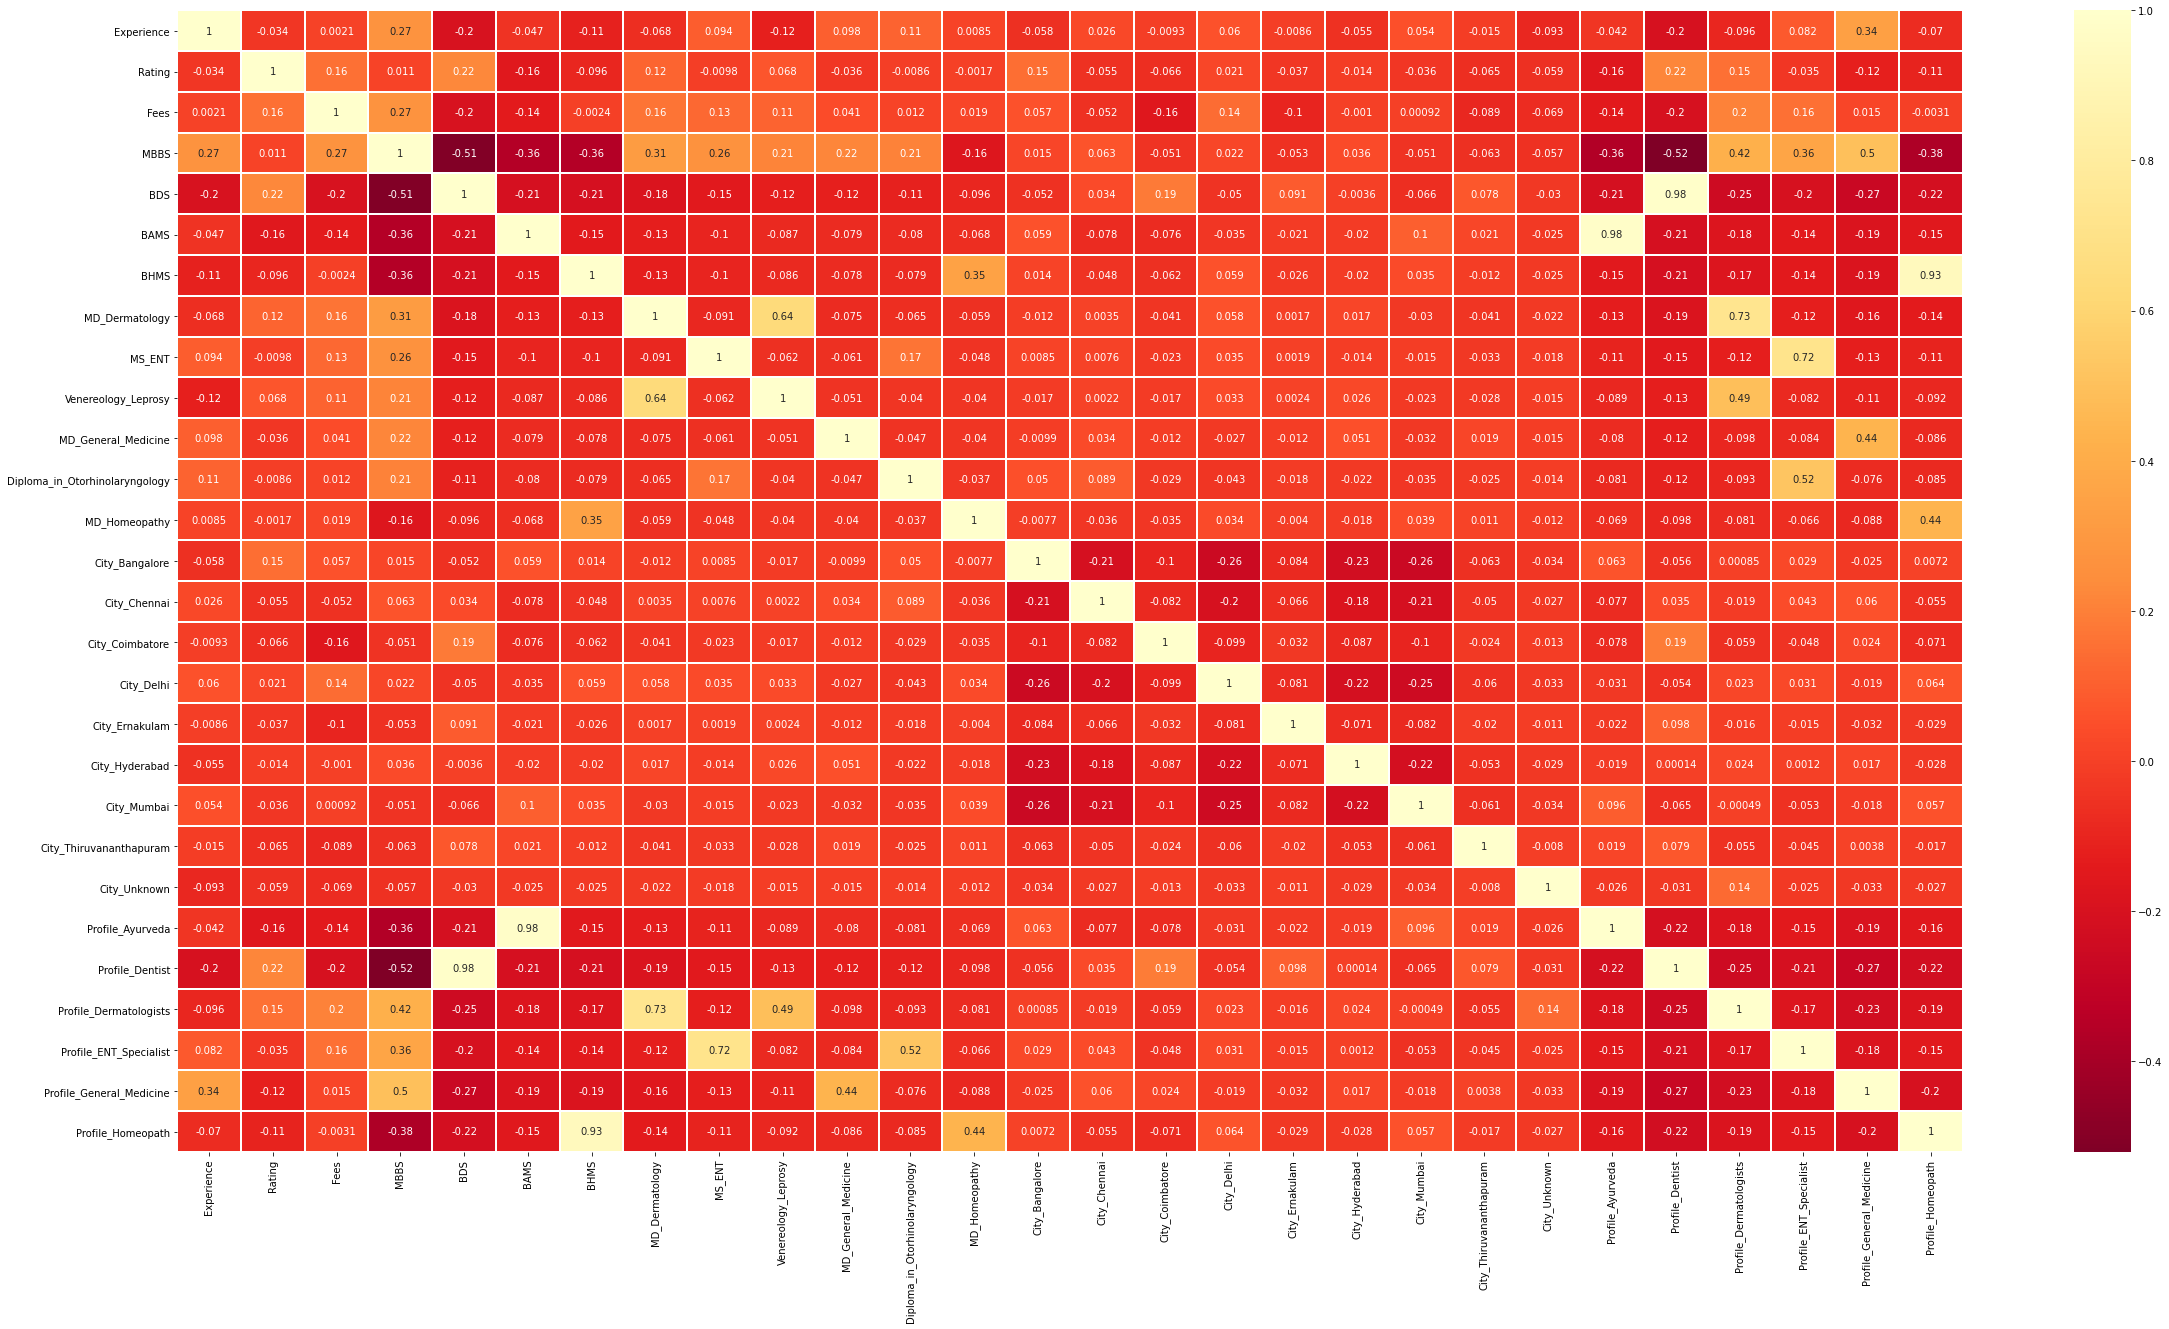

In [285]:
plt.figure(figsize=(40,21))
sns.heatmap(datacor,cmap='YlOrRd_r',annot=True,linewidth=1)

Correlation Among all column is shown here . Since it is huge . we can visualize all column vs fees

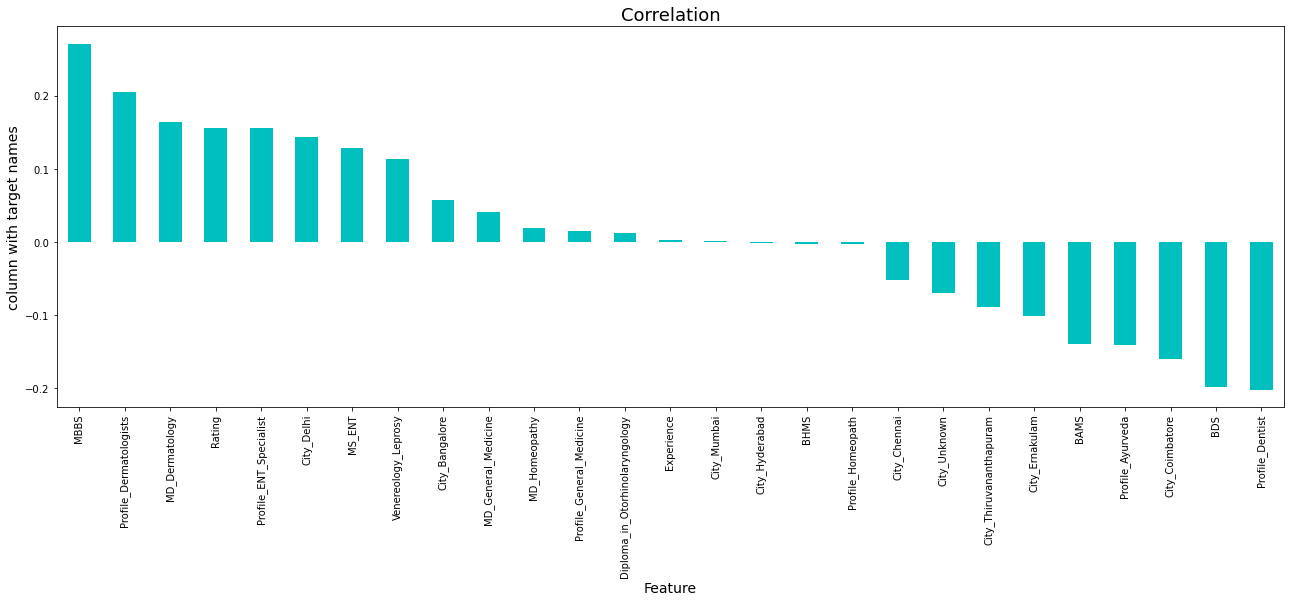

In [286]:
plt.figure(figsize=(22,7))
data.corr()['Fees'].sort_values(ascending=False).drop(['Fees']).plot(kind='bar',color='c')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("column with target names",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

This is how all feature columns are correlated with fees target variable. as discussed experirnce doesn't make much impact for fees. Mbbs is highly positively correlated and Dentist profile is highly negatively correlated.

which means if degree is MBBS and profile is dermatoligists high chance for high fees

if degree is BDS and profile is dentist high chances of low fees

# Analyzing Output data

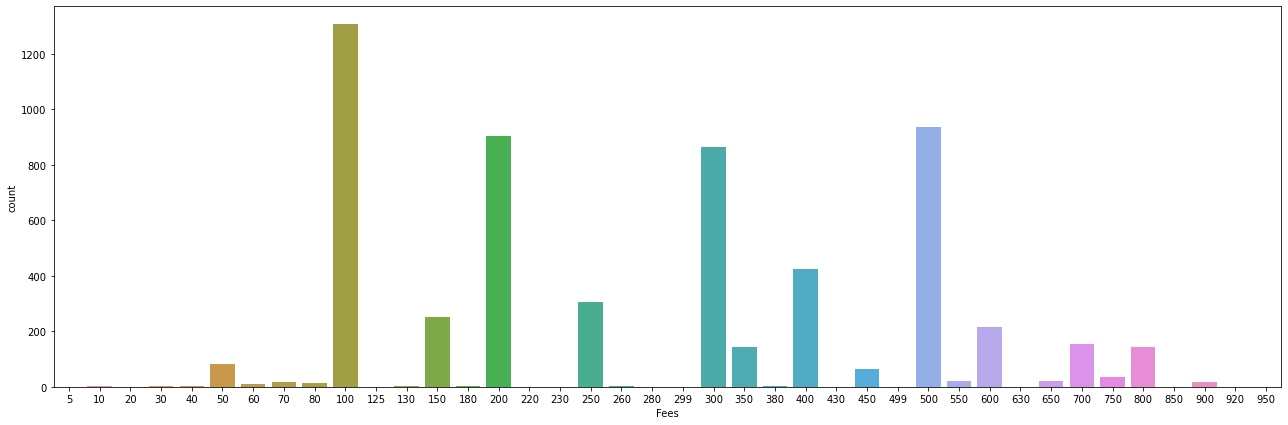

In [287]:
#we can see the count of each fees available in dataset
plt.figure(figsize=(22,7))
sns.countplot(data.Fees)

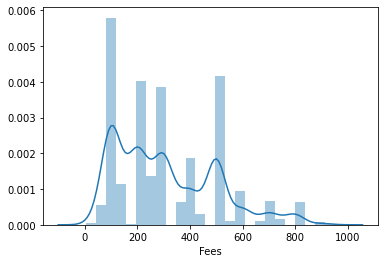

In [288]:
sns.distplot(data.Fees)

The distribution of fees data in train set is as shown above. we have high data between 0-200 rupees

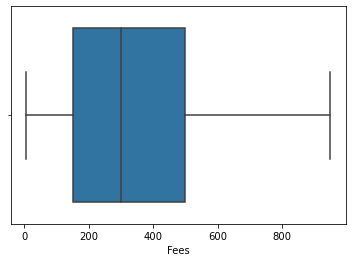

In [290]:
sns.boxplot(data.Fees)

The minimum value is 0 and maximum value is above 800. 25th to 75th percentile lies between 150-500

Since the feature columns are of categorical type. we need not correct skewness or remove outliers. Let us start building model

# Model Building

In [298]:
#initialising x and y

x=data.drop('Fees',axis=1)
y=data['Fees']

In [299]:
x.head()

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD_Dermatology,MS_ENT,Venereology_Leprosy,MD_General_Medicine,...,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
0,24,10,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [300]:
x.shape

(5961, 27)

In [301]:
y.shape

(5961,)

Let us use RSMLE(Root-Mean-Squared-Log-Error (RMSLE) error) metrics to predict the score of the model

RMSLE: techniques to find out the difference between the predicted values by model and the actual values. Only we take the log of predicted values and actual values

In [303]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [304]:
# to use RMSLE we will create our own scorer
from sklearn.metrics import make_scorer

# calculate RMSLE (SCORE func).
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred - y)**2)) / len(y))**1/2

# SCORING func for Cross Validation (RandomizedSearchCV)
scorer = make_scorer(score_func = score, greater_is_better=True)

In [309]:
# different algorithm going to use

knnr=KNeighborsRegressor()
svmr = SVR(gamma='scale')
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
adr=AdaBoostRegressor()

In [311]:
model=[knnr,svmr,dtr,rfr,adr]  #we can use it afterwards if needed

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print(m, score(pred,y_test))

KNeighborsRegressor() 0.775715136493229
SVR() 0.7731959742585344
DecisionTreeRegressor() 0.6864203444038648
RandomForestRegressor() 0.7644126763522305
AdaBoostRegressor() 0.7668948307997606


In [312]:
from sklearn.ensemble import VotingRegressor

In [315]:
voting_reg = VotingRegressor([('knn',knnr), ('svm',svmr), ('dt',dtr), ('rf',rfr),('ada',adr)])
voting_reg.fit(x_train,y_train)
pred = voting_reg.predict(x_test)
print("score:",score(pred,y_test))

score: 0.7854228338741949


All the models show almost same range of accuracy 

There is less parameter in Knn and after HyperParameter tuning the accuracy was 78.3. And after doing HyperParameter tuning of SVM the accuracy was 79.2. Thus, I move with RandomForest Regressor

RandomForestRegressor model  hypertuning for determining better accuracy

# HyperParameter Tuning for RandomForest

In [323]:
# hyperparameter tuning of RandomForest

#no. of tress random_forest
n_estimators = [int(x) for x in np.linspace(start=150,stop=1000,num=6)]
#max levels in tree
max_depth = [int(x) for x in np.linspace(start=6,stop=30,num=5)]
#min no. of splitting required to split a node
min_samples_split = [2,7,10]
#min no. of sample required at each leaf node
min_samples_leaf = [2,5,10]
#max_features
max_features=['auto','sqrt']
# generate a dictionary of all the Hyper Parameters
rand_params = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features':max_features,
              }

In [324]:
from sklearn.model_selection import RandomizedSearchCV

rand_rfr= RandomizedSearchCV(estimator=rfr,param_distributions=rand_params,cv= 5,n_jobs=-1)

In [325]:
rand_rfr.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 7, 10],
                                        'n_estimators': [150, 320, 490, 660,
                                                         830, 1000]})

In [326]:
best_parameters=rand_rfr.best_params_

In [327]:
best_parameters

{'n_estimators': 490,
 'min_samples_split': 7,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 12}

In [329]:
rfr_hyp = RandomForestRegressor(n_estimators= 490, min_samples_split= 7, min_samples_leaf= 5, max_features= 'sqrt', max_depth= 12)
rfr_hyp.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=7, n_estimators=490)

In [330]:
pred=rfr_hyp.predict(x_test)
print("score:",score(pred,y_test))

score: 0.7959163321257007


# After hypertuning, The accuracy of the model is increased by almost 5 percent that is from 76.44% to 79.59%. RandomForestRegressor (hypertuned model) is chosen to be the best model with almost 80% accuracy

RandomForestRegressor (hypertuned) Model is the final model

In [333]:
# Testing data for predicting new values 

In [334]:
result=rfr_hyp.predict(df)

In [338]:
result=result.round(2)

In [339]:
df['Fees']=result

In [340]:
df.head()

,Experience,Rating,MBBS,BDS,BHMS,BAMS,MD_Dermatology,MS_ENT,MD_General_Medicine,Venereology_Leprosy,...,City_Mumbai,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath,Fees
0,35,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,244.36
1,31,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,319.54
2,40,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,278.02
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,256.59
4,16,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,245.71


In [341]:
df.to_csv("predicted fees for test data.csv")

Thus, The doctor fees values is predicted for the test dataset given

# Conclusion - Saving the model for future use

In [342]:
joblib.dump(rfr_hyp,"rfr_hyp_doctorfees_prediction.obj")

['rfr_hyp_doctorfees_prediction.obj']

In [343]:
#Lets Check loading the file 
fees_prediction=joblib.load("rfr_hyp_doctorfees_prediction.obj")

In [345]:
pred=rfr_hyp.predict(x_test)
Conclusion=pd.DataFrame([fees_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [346]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967
Predicted,263.788547,289.456646,202.633886,368.678919,265.941867,305.765855,212.082096,229.682949,298.687774,281.022517,...,323.588651,312.98692,326.957092,143.295868,391.019978,265.21692,267.057188,217.285083,280.081249,227.847479
Original,263.788547,289.456646,202.633886,368.678919,265.941867,305.765855,212.082096,229.682949,298.687774,281.022517,...,323.588651,312.98692,326.957092,143.295868,391.019978,265.21692,267.057188,217.285083,280.081249,227.847479


The model is working well

After Training and Testing five algorithm model. The best accuracy model was determined as random forest classifier with almost 80% accuracy after all the data cleaning, pre-processing, training and prediction as well as evaluation phase.

The Fees is predicted for the test dataset provided 

# Model Created Succesfully